In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../dataset/JobDescriptions/JobDescription.csv')
df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [4]:
# Keep only the columns we're interested in
df = df[['job_id', 'title', 'description']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   job_id       123849 non-null  int64 
 1   title        123849 non-null  object
 2   description  123842 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
df.isnull().sum()

job_id         0
title          0
description    7
dtype: int64

In [7]:
df = df.dropna(subset=['description'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123842 entries, 0 to 123848
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   job_id       123842 non-null  int64 
 1   title        123842 non-null  object
 2   description  123842 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


In [9]:
df['title'].value_counts()

title
Sales Manager                                     673
Customer Service Representative                   373
Project Manager                                   354
Administrative Assistant                          254
Senior Accountant                                 238
                                                 ... 
Tool & Die Maker I - 2nd Shift                      1
Breast Surgery - Nurse Practitioner - Abington      1
Scrum Coach                                         1
Account Executive, Experiential                     1
Marketing Social Media Specialist                   1
Name: count, Length: 72516, dtype: int64

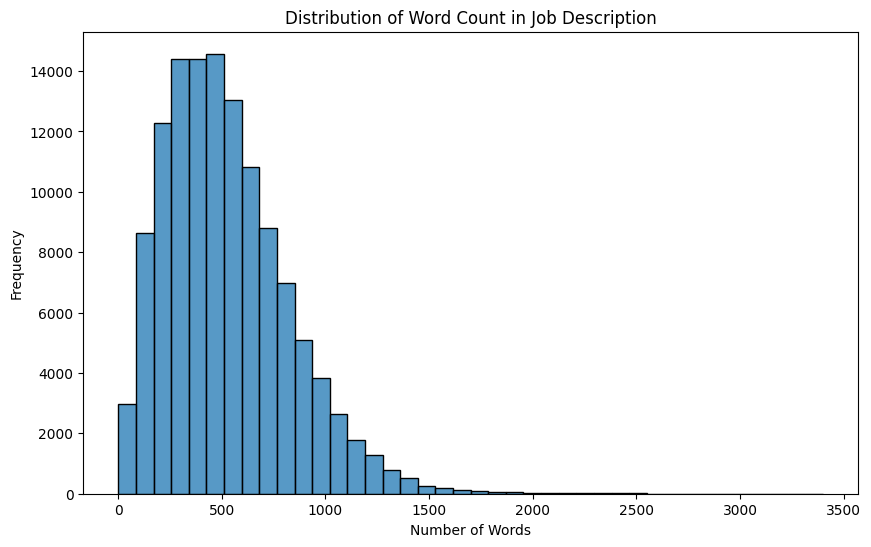

In [10]:
word_count = df['description'].apply(lambda x: len(str(x).split()))     # For each job description, "word_count" contains the number of words
max_word_count = word_count.max()

plt.figure(figsize=(10, 6))
sns.histplot(word_count, bins=40)
plt.title('Distribution of Word Count in Job Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, max_word_count+500, 500))
plt.show()

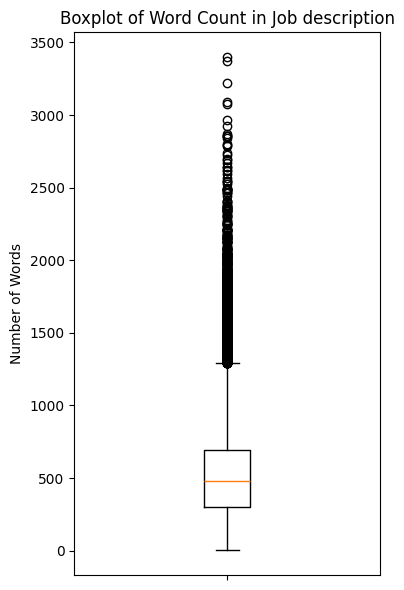

In [11]:
plt.figure(figsize=(4, 6))
plt.boxplot(word_count)
plt.title('Boxplot of Word Count in Job description')
plt.ylabel('Number of Words')
plt.xticks([1], [""])
plt.yticks(np.arange(0, max_word_count+500, 500))
plt.tight_layout()
plt.show()

In [12]:
desc = word_count.describe()
q1 = word_count.quantile(0.25)
q3 = word_count.quantile(0.75)
iqr = q3 - q1

print("Statistics of Word Count in Job Description:")
print(f"Minimum      : {desc['min']}")
print(f"1st Quartile : {q1}")
print(f"Median       : {desc['50%']}")
print(f"3rd Quartile : {q3}")
print(f"Maximum      : {desc['max']}")
print(f"Mean         : {desc['mean']:.2f}")
print(f"IQR (Q3 - Q1): {iqr}")

Statistics of Word Count in Job Description:
Minimum      : 1.0
1st Quartile : 298.0
Median       : 477.0
3rd Quartile : 696.0
Maximum      : 3400.0
Mean         : 523.06
IQR (Q3 - Q1): 398.0
